In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
%matplotlib inline

Using TensorFlow backend.


In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='t10k-labels-idx1-ubyte.gz')

num_classes = 26
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


In [61]:
model = Sequential()
model.add(Dense(26, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print( l.name, l.input_shape,'==>',l.output_shape)
print()
print( model.summary())

dense_9 (None, 784) ==> (None, 26)
dense_10 (None, 26) ==> (None, 26)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 26)                20410     
_________________________________________________________________
dense_10 (Dense)             (None, 26)                702       
Total params: 21,112
Trainable params: 21,112
Non-trainable params: 0
_________________________________________________________________
None


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.5870 - acc: 0.8521 - val_loss: 0.2964 - val_acc: 0.9162
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2781 - acc: 0.9209 - val_loss: 0.2461 - val_acc: 0.9310
Epoch 3/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.2400 - acc: 0.9323 - val_loss: 0.2226 - val_acc: 0.9381
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2156 - acc: 0.9386 - val_loss: 0.2058 - val_acc: 0.9403
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1976 - acc: 0.9434 - val_loss: 0.1968 - val_acc: 0.9427

Test loss: 0.197
Test accuracy: 0.943


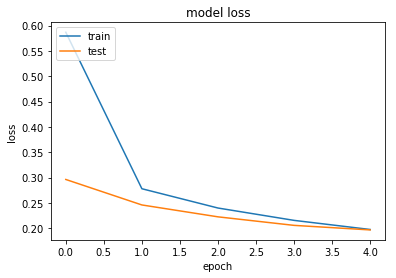

In [62]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print()
print( 'Test loss:', round(score[0], 3))
print( 'Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [63]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays

In [64]:
len(weights)

2

In [65]:
weights

[array([[-0.58514351,  0.46148169,  0.43132839, -0.22726999, -0.23295489,
         -0.22419065,  0.1582022 ,  0.25571033,  0.30208534, -0.03307213,
         -0.56412983, -0.31240153, -0.13943082, -0.39250174, -0.53595722,
         -0.72105169, -0.17239498, -0.72828782, -0.03537374, -0.45164263,
         -0.45128596, -0.47984564, -0.44207209, -0.16784345, -0.44412285,
         -0.21512401],
        [ 0.27863145, -0.49035737,  0.07286943, -0.17879736, -0.25160202,
          0.35129628,  0.11654895, -0.25191689,  0.37410435,  0.20550057,
         -0.26282123, -0.31152534, -0.27565375, -0.36755642, -0.26140097,
         -0.25795394, -0.49101654, -0.13183217,  0.01117733, -0.4225173 ,
         -0.08729099, -0.0018551 , -0.54487038, -0.56316513, -0.615529  ,
         -0.49022084],
        [ 0.35320771,  0.15571705,  0.69749129, -0.13786304, -1.0216558 ,
         -0.44116709, -0.30331311, -0.05856011, -0.09549635, -1.02109957,
         -0.49493867, -0.30175543, -0.43542102, -0.07166853, -0.38